In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd 
import numpy as np

In [3]:
df = pd.read_csv('../data/osstate/extracted/states_2022-01-03-00.csv.gz', compression='gzip')
df.head()

,time,icao24,lat,lon,velocity,heading,vertrate,callsign,onground,alert,spi,squawk,baroaltitude,geoaltitude,lastposupdate,lastcontact
0,1641168000,4ca8e8,52.980357,0.948434,193.792496,284.921620,0.00000,RYR23RR,False,False,False,2267.0,11582.40,11330.94,1.641168e+09,1.641168e+09
1,1641168000,471f41,42.852219,5.691572,239.283384,55.865788,0.32512,WZZ5552,False,False,False,1014.0,10972.80,11300.46,1.641168e+09,1.641168e+09
2,1641168000,aa56d4,38.396844,-77.004905,288.196102,39.059131,0.00000,UAL1560,False,False,False,5665.0,11277.60,11422.38,1.641168e+09,1.641168e+09
3,1641168000,3c4582,52.690109,-1.461182,158.457103,149.355259,26.00960,BOX193,False,False,False,2261.0,3695.70,3604.26,1.641168e+09,1.641168e+09
4,1641168010,a4ee2e,40.516694,-76.364906,164.960141,281.695403,5.20192,AAL2663,False,False,False,1634.0,8168.64,8168.64,1.641168e+09,1.641168e+09


In [4]:
# add an ident column by concatenating df['callsign'] and df['icao24']
df['ident'] = (df['callsign'].str.strip()+'_'+df['icao24'].str.strip())
# add a column rtime that is df['time'] - df['time'].min()
df['rtime'] = df['time'] - df['time'].min()
df.head()

,time,icao24,lat,lon,velocity,heading,vertrate,callsign,onground,alert,spi,squawk,baroaltitude,geoaltitude,lastposupdate,lastcontact,ident,rtime
0,1641168000,4ca8e8,52.980357,0.948434,193.792496,284.921620,0.00000,RYR23RR,False,False,False,2267.0,11582.40,11330.94,1.641168e+09,1.641168e+09,RYR23RR_4ca8e8,0
1,1641168000,471f41,42.852219,5.691572,239.283384,55.865788,0.32512,WZZ5552,False,False,False,1014.0,10972.80,11300.46,1.641168e+09,1.641168e+09,WZZ5552_471f41,0
2,1641168000,aa56d4,38.396844,-77.004905,288.196102,39.059131,0.00000,UAL1560,False,False,False,5665.0,11277.60,11422.38,1.641168e+09,1.641168e+09,UAL1560_aa56d4,0
3,1641168000,3c4582,52.690109,-1.461182,158.457103,149.355259,26.00960,BOX193,False,False,False,2261.0,3695.70,3604.26,1.641168e+09,1.641168e+09,BOX193_3c4582,0
4,1641168010,a4ee2e,40.516694,-76.364906,164.960141,281.695403,5.20192,AAL2663,False,False,False,1634.0,8168.64,8168.64,1.641168e+09,1.641168e+09,AAL2663_a4ee2e,10


In [5]:
# Drop the columns we don't need
df.drop(columns=['onground', 'alert', 'spi', 'squawk'], inplace=True)

In [6]:
idents = df['ident'].unique()
print('Number of unique idents:', len(idents))

Number of unique idents: 10323


## One aircraft

In [14]:
# Get the first ident
ident = idents[6]
df_ident = df[df['ident'] == ident]
df_ident.head()

,time,icao24,lat,lon,velocity,heading,vertrate,callsign,baroaltitude,geoaltitude,lastposupdate,lastcontact,ident,rtime
6,1641168010,c03fd5,40.276670,-74.825759,263.724688,20.556045,0.0,SWG735,11887.2,11948.16,1.641168e+09,1.641168e+09,SWG735_c03fd5,10
6526,1641168020,c03fd5,40.299728,-74.814453,263.243061,20.595361,0.0,SWG735,11887.2,11948.16,1.641168e+09,1.641168e+09,SWG735_c03fd5,20
14610,1641168030,c03fd5,40.321426,-74.803833,263.243061,20.595361,0.0,SWG735,11887.2,11948.16,1.641168e+09,1.641168e+09,SWG735_c03fd5,30
15606,1641168040,c03fd5,40.343307,-74.793091,262.580704,20.529769,0.0,SWG735,11887.2,11948.16,1.641168e+09,1.641168e+09,SWG735_c03fd5,40
22314,1641168050,c03fd5,40.365189,-74.782410,262.400734,20.424573,0.0,SWG735,11887.2,11948.16,1.641168e+09,1.641168e+09,SWG735_c03fd5,50


In [15]:
import matplotlib.pyplot as plt
from geo.drift_compensation import get_track_drift_rate

Text(0.5, 1.0, 'Heading of SWG735_c03fd5')

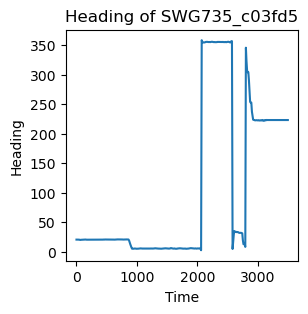

In [16]:
# Plot the heading (actually flight track) of the aircraft with time
rlastposupdate = df_ident['lastposupdate'].values - df_ident['lastposupdate'].min()
hdg = df_ident['heading'].values
vel = df_ident['velocity'].values / 1000 # km/s
lat = df_ident['lat'].values
lon = df_ident['lon'].values
alt = df_ident['geoaltitude'].values
plt.figure(figsize=(3,3))
plt.plot(rlastposupdate, hdg)
plt.xlabel('Time')
plt.ylabel('Heading')
plt.title(f'Heading of {ident}')

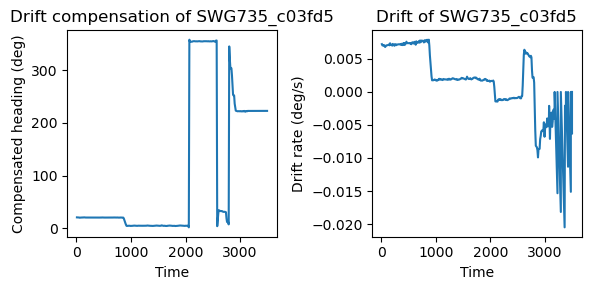

In [17]:
# Compute the drift compensation
track_drift = np.zeros_like(hdg)
cumul_drift = 0
hdg_compensated = np.zeros_like(hdg)
for i in range(1, len(hdg)):
    # We will use the last time's value to compensate the drift for this time
    track_drift[i] = get_track_drift_rate(lat[i-1], lon[i-1], hdg[i-1]) * vel[i-1] * (rlastposupdate[i] - rlastposupdate[i-1])
    if np.abs(track_drift[i]) > 1:
        print(f'lat: {lat[i-1]}, lon: {lon[i-1]}, hdg: {hdg[i-1]}, vel: {vel[i-1]}, time: {rlastposupdate[i]}')
        print(f'drift: {track_drift[i]}')
        print(f'x: {get_track_drift_rate(lat[i-1], lon[i-1], hdg[i-1])}')
    cumul_drift += track_drift[i]
    hdg_compensated[i] = (hdg[i] - cumul_drift) % 360


# Plot the drift compensation
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.plot(rlastposupdate[1:], hdg_compensated[1:])
plt.xlabel('Time')
plt.ylabel('Compensated heading (deg)')
plt.title(f'Drift compensation of {ident}')

plt.subplot(1,2,2)
plt.plot(rlastposupdate[1:], track_drift[1:])
plt.xlabel('Time')
plt.ylabel('Drift rate (deg/s)')
plt.title(f'Drift of {ident}')

plt.tight_layout() 

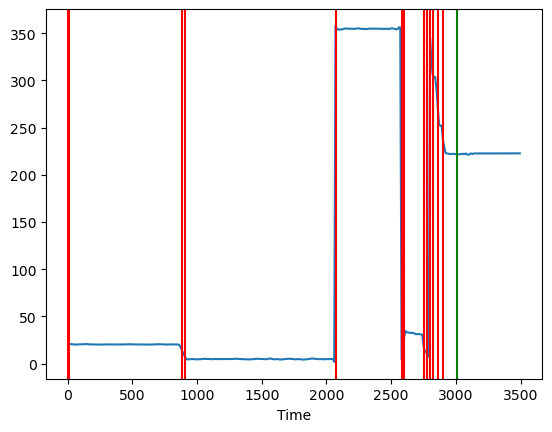

In [18]:
# Get changepoints in the heading
from changepy import pelt
from changepy.costs import normal_mean

# Get the changepoints
changepoints = pelt(normal_mean(hdg_compensated, 1), len(hdg_compensated))

# Write down the turning points
tp_lat = []
tp_lon = []
tp_time = []

# One final changepoint at the end of the flight or when the aircraft lands
landed_at = np.where(alt < 500)[0]
if len(landed_at) > 0:
    changepoints = np.append(changepoints, landed_at[0])
else:
    changepoints = np.append(changepoints, len(hdg_compensated)-1)

for i in range(len(changepoints)-1):
    tp_lat.append(lat[changepoints[i]])
    tp_lon.append(lon[changepoints[i]])
    tp_time.append(rlastposupdate[changepoints[i]])
    
    # if i == 0:
    #     tp_from_hdg.append(np.mean(hdg_compensated[:changepoints[i]]))
    # else:
    #     tp_from_hdg.append(np.mean(hdg_compensated[changepoints[i-1]:changepoints[i]]))
    # tp_to_hdg.append(np.mean(hdg_compensated[changepoints[i]:changepoints[i+1]]))

# Plot the changepoints 
plt.plot(rlastposupdate[1:], hdg_compensated[1:])
for i, cp in enumerate(changepoints):
    if i == len(changepoints)-1:
        plt.axvline(x=rlastposupdate[cp], color='g')
    else:
        plt.axvline(x=rlastposupdate[cp], color='r')
    plt.xlabel('Time')

0 0.0 10.233999967575073
Merging 0 and 1
0 5.116999983787537 880.2230000495911
1 880.2230000495911 909.9670000076294
Merging 1 and 2
1 895.0950000286102 2069.919000148773
2 2069.919000148773 2580.1150000095367
3 2580.1150000095367 2600.1130001544952
Merging 3 and 4
3 2590.114000082016 2750.1849999427795
4 2750.1849999427795 2780.1710000038147
Merging 4 and 5
4 2765.177999973297 2800.072000026703
Merging 4 and 5
4 2782.625 2819.7490000724792
Merging 4 and 5
4 2801.1870000362396 2859.7829999923706
Merging 4 and 5
4 2830.485000014305 2899.973000049591


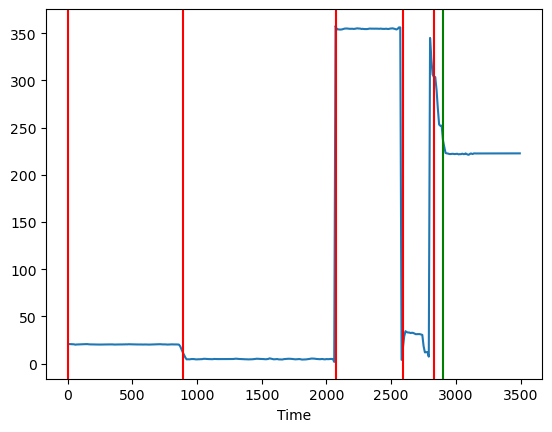

In [19]:
# Merge changepoints that are too close to each other
i = 0
while i < len(tp_lat)-1:
    print(i, tp_time[i], tp_time[i+1])
    if (tp_time[i+1] - tp_time[i]) < 60:
        print(f'Merging {i} and {i+1}')
        tp_lat[i] = (tp_lat[i] + tp_lat[i+1]) / 2
        tp_lon[i] = (tp_lon[i] + tp_lon[i+1]) / 2
        tp_time[i] = (tp_time[i] + tp_time[i+1]) / 2
        # tp_from_hdg[i] = (tp_from_hdg[i] + tp_from_hdg[i+1]) / 2
        # tp_to_hdg[i] = (tp_to_hdg[i] + tp_to_hdg[i+1]) / 2
        tp_lat.pop(i+1)
        tp_lon.pop(i+1)
        tp_time.pop(i+1)
        # tp_from_hdg.pop(i+1)
        # tp_to_hdg.pop(i+1)
    else:
        i += 1

# Plot the changepoints 
plt.plot(rlastposupdate[1:], hdg_compensated[1:])
for i, cp in enumerate(tp_time):
    if i == len(tp_time)-1:
        plt.axvline(x=tp_time[i], color='g')
    else:
        plt.axvline(x=tp_time[i], color='r')
    plt.xlabel('Time')

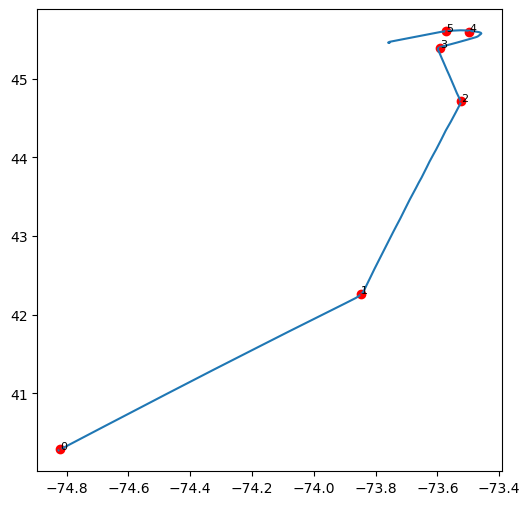

In [20]:
# Reconstruct the approximate flight path
plt.figure(figsize=(6,6))
plt.plot(lon, lat)
plt.plot(tp_lon, tp_lat, 'ro', markersize=1)
for i in range(len(tp_lat)):
   plt.scatter(tp_lon[i], tp_lat[i], color='r')
   plt.text(tp_lon[i], tp_lat[i], f'{i}', fontsize=8)

We actually do not care about the heading because we only rely on the the flight track to derive changepoints. Afterwards, everything is connected through great circle path.

## Altitude changepoint

Text(0.5, 1.0, 'Altitude of SWG735_c03fd5')

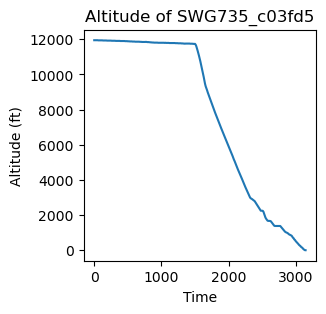

In [21]:
plt.figure(figsize=(3,3))
plt.plot(rlastposupdate, alt)
plt.xlabel('Time')
plt.ylabel('Altitude (ft)')
plt.title(f'Altitude of {ident}')

Text(0.5, 1.0, 'Altitude of SWG735_c03fd5')

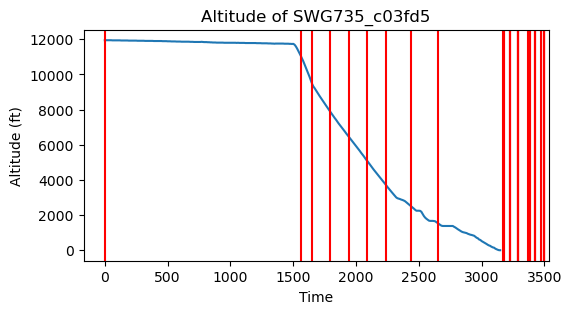

In [24]:
# Detect changepoints in altitude
from changepy.costs import normal_mean
from changepy import pelt

# Get the changepoints
changepoints = pelt(normal_mean(alt, 1000), len(alt))

# Plot the changepoints
plt.figure(figsize=(6,3))
plt.plot(rlastposupdate, alt)
for cp in changepoints:
    plt.axvline(x=rlastposupdate[cp], color='r')
plt.xlabel('Time')
plt.ylabel('Altitude (ft)')
plt.title(f'Altitude of {ident}')


0 0.0 1559.957999944687
1 1559.957999944687 1649.8919999599457
Merging 1 and 2
1 1604.9249999523163 1789.7330000400543
2 1789.7330000400543 1940.1150000095367
3 1940.1150000095367 2089.90700006485
4 2089.90700006485 2240.0599999427795
5 2240.0599999427795 2440.0220000743866
6 2440.0220000743866 2650.069000005722
7 2650.069000005722 3170.0250000953674
8 3170.0250000953674 3175.28200006485
Merging 8 and 9
8 3172.6535000801086 3175.28200006485
Merging 8 and 9
8 3173.9677500724792 3227.1330001354218
Merging 8 and 9
8 3200.5503751039505 3227.1330001354218
Merging 8 and 9
8 3213.841687619686 3227.1330001354218
Merging 8 and 9
8 3220.487343877554 3288.5789999961853
Merging 8 and 9
8 3254.5331719368696 3288.5789999961853
Merging 8 and 9
8 3271.5560859665275 3288.5789999961853
Merging 8 and 9
8 3280.0675429813564 3288.5789999961853
Merging 8 and 9
8 3284.323271488771 3364.9500000476837
Merging 8 and 9
8 3324.6366357682273 3382.401000022888
Merging 8 and 9
8 3353.5188178955577 3382.401000022888


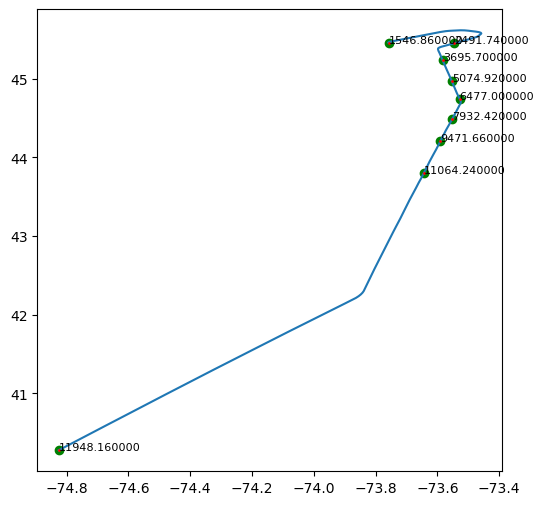

In [28]:
dp_time = []
dp_lat = []
dp_lon = []
dp_alt = []

for i in range(len(changepoints)-1):
    dp_time.append(rlastposupdate[changepoints[i]])
    dp_lat.append(lat[changepoints[i]])
    dp_lon.append(lon[changepoints[i]])
    dp_alt.append(alt[changepoints[i]])

# Merge changepoints that are too close to each other
i = 0
while i < len(dp_lat)-1:
    print(i, dp_time[i], dp_time[i+1])
    if (dp_time[i+1] - dp_time[i]) < 120:
        print(f'Merging {i} and {i+1}')
        dp_lat[i] = (dp_lat[i] + dp_lat[i+1]) / 2
        dp_lon[i] = (dp_lon[i] + dp_lon[i+1]) / 2
        dp_time[i] = (dp_time[i] + dp_time[i+1]) / 2
        dp_alt[i] = (dp_alt[i] + dp_alt[i+1]) / 2
        dp_lat.pop(i+1)
        dp_lon.pop(i+1)
        dp_time.pop(i+1)
        dp_alt.pop(i+1)
    else:
        i += 1

# Plot the changepoints
plt.figure(figsize=(6,6))
plt.plot(lon, lat)
plt.plot(dp_lon, dp_lat, 'ro', markersize=1)
for i in range(len(dp_lat)):
   plt.scatter(dp_lon[i], dp_lat[i], color='g')
   plt.text(dp_lon[i], dp_lat[i], f'{alt[changepoints[i]]:2f}', fontsize=8)

# Test the library functions

In [76]:
df_ident = df[df['ident'] == idents[6]]
df.dropna(how='any', inplace=True)

In [77]:
df_ident.head()

,time,icao24,lat,lon,velocity,heading,vertrate,callsign,baroaltitude,geoaltitude,lastposupdate,lastcontact,ident,rtime
6,1641168010,c03fd5,40.276670,-74.825759,263.724688,20.556045,0.0,SWG735,11887.2,11948.16,1.641168e+09,1.641168e+09,SWG735_c03fd5,10
6526,1641168020,c03fd5,40.299728,-74.814453,263.243061,20.595361,0.0,SWG735,11887.2,11948.16,1.641168e+09,1.641168e+09,SWG735_c03fd5,20
14610,1641168030,c03fd5,40.321426,-74.803833,263.243061,20.595361,0.0,SWG735,11887.2,11948.16,1.641168e+09,1.641168e+09,SWG735_c03fd5,30
15606,1641168040,c03fd5,40.343307,-74.793091,262.580704,20.529769,0.0,SWG735,11887.2,11948.16,1.641168e+09,1.641168e+09,SWG735_c03fd5,40
22314,1641168050,c03fd5,40.365189,-74.782410,262.400734,20.424573,0.0,SWG735,11887.2,11948.16,1.641168e+09,1.641168e+09,SWG735_c03fd5,50


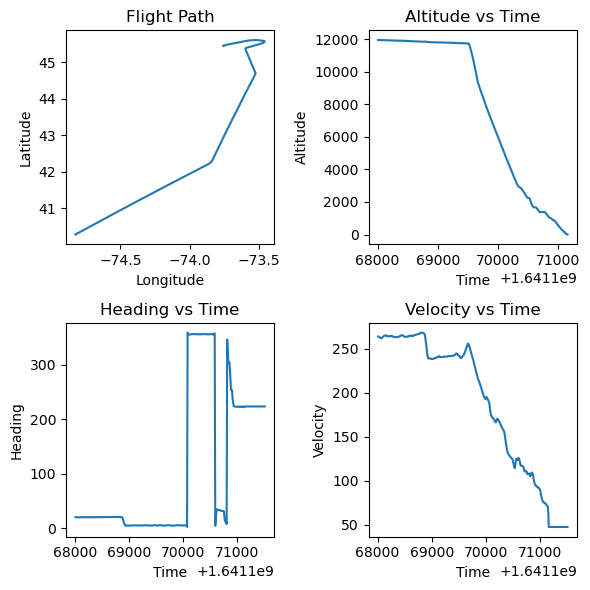

<Figure size 640x480 with 0 Axes>

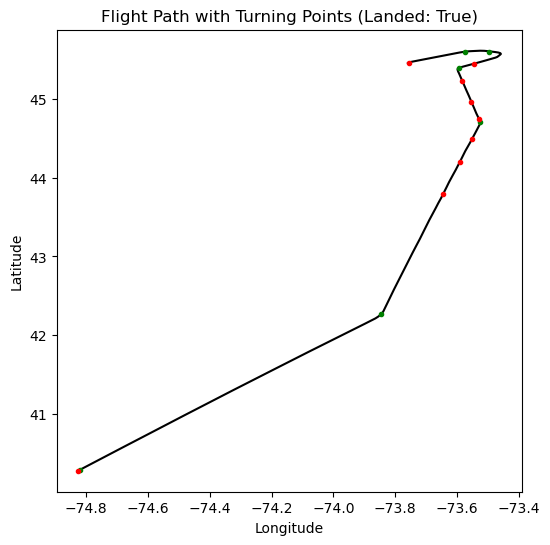

In [78]:
from get_turn import get_turning_points, plot_changepoints
from potters import plot_df
plot_df(df_ident)

turns = get_turning_points(df_ident)
plt.figure()
plot_changepoints(turns, df_ident)
